# <a id='toc1_'></a>[Topic 16: Bode Asymptotic Plots](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Topic 16: Bode Asymptotic Plots](#toc1_)    
  - [First Order](#toc1_1_)    
  - [Second Order](#toc1_2_)    
  - [Examples 16-20](#toc1_3_)    
  - [Examples 16-24](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

p = Symbol('p')
z = Symbol('z')
s = sympy.Symbol('s')       # define `s` as symbol
j = complex(0,1)

try:
    import bodas
except:
    %pip install bodas
    import bodas

try: 
    import cairosvg
except:
    %pip install cairosvg
    import cairosvg

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d
from control import bode_plot, nyquist_plot
    
from control_materials import *

Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found
This is a library of useful functions for the control systems in 16.06


## <a id='toc1_1_'></a>[First Order](#toc0_)

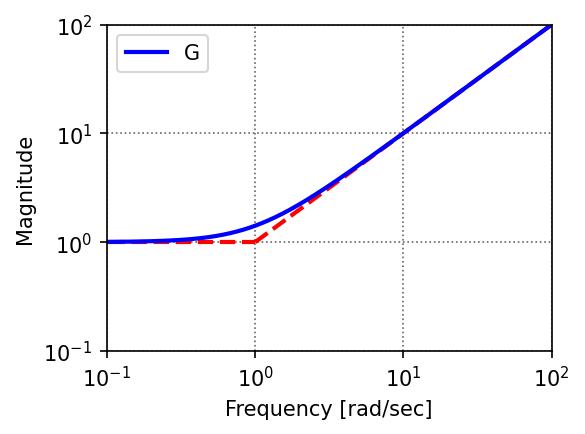

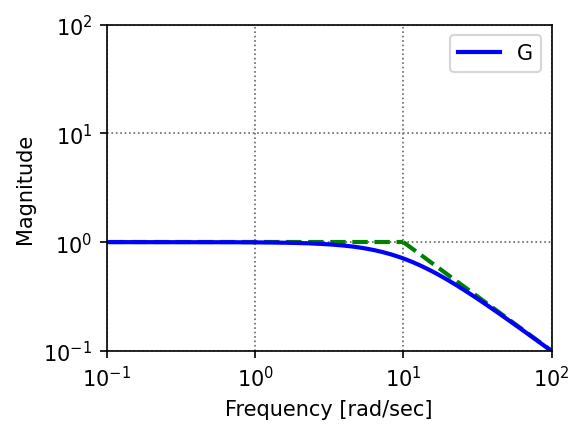

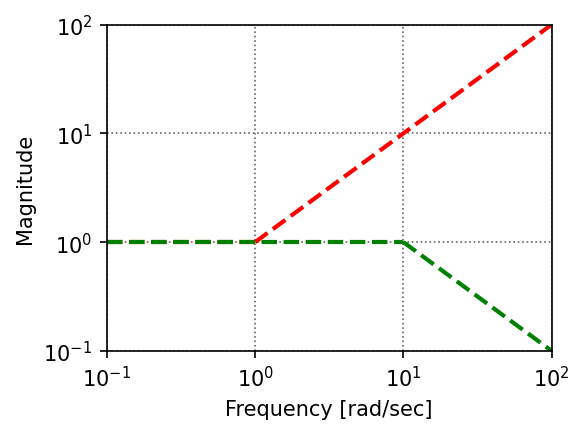

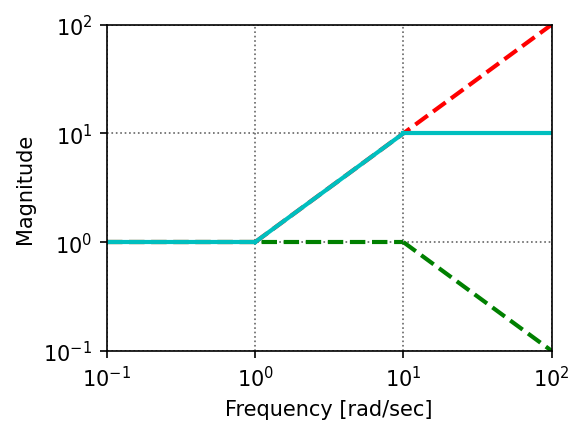

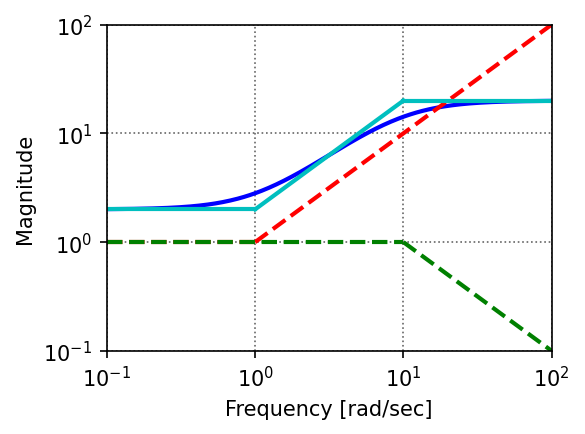

In [2]:
w = logspace(-1,2,300)
#zero
G1 = tf([1,1],[0,1]) 
[G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.plot([0,1],[1,1],color='r',ls='--')
ax.plot([1,100],[1,100],color='r',ls='--')
ax.loglog(G1w,G1m,'b-',label='G')
ax.legend()
ax.set_ylim([.1,100])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_approx_z.pdf',dpi=600)
plt.show()

# pole
G1 = tf([1],[1/10,1]) 
[G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.plot([0,10],[1,1],color='g',ls='--')
ax.plot([10,100],[1,1/10],color='g',ls='--')
ax.loglog(G1w,G1m,'b-',label='G')
nicegrid(ax)
ax.legend()
ax.set_ylim([.1,100])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
savefig('./figs/L14_approx_p.pdf',dpi=600)
plt.show()

# approx
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.loglog([.1,1],[1,1],color='r',ls='--')
ax.loglog([1,100],[1,100],color='r',ls='--')
ax.loglog([.1,10],[1,1],color='g',ls='--')
ax.loglog([10,100],[1,1/10],color='g',ls='--')
nicegrid(ax)
ax.set_ylim([.1,100])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
savefig('./figs/L14_approx_pz.pdf',dpi=600)
plt.show()

# approx
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.loglog([.1,1],[1,1],color='r',ls='--')
ax.loglog([1,100],[1,100],color='r',ls='--')
ax.loglog([.1,10],[1,1],color='g',ls='--')
ax.loglog([10,100],[1,1/10],color='g',ls='--')
ax.loglog([.1,1],[1,1],color='c',ls='-',lw=2)
ax.loglog([1,10],[1,10],color='c',ls='-',lw=2)
ax.loglog([10,100],[10,10],color='c',ls='-',lw=2)
nicegrid(ax)
ax.set_ylim([.1,100])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
savefig('./figs/L14_approx_pz2.pdf',dpi=600)
plt.show()

# approx
G1 = 20*tf([1,1],[1,10]) 
[G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.loglog(G1w,G1m,'b-',label='G')
ax.loglog([.1,1],[1,1],color='r',ls='--')
ax.loglog([1,100],[1,100],color='r',ls='--')
ax.loglog([.1,10],[1,1],color='g',ls='--')
ax.loglog([10,100],[1,1/10],color='g',ls='--')
ax.loglog([.1,1],[2,2],color='c',ls='-',lw=2)
ax.loglog([1,10],[2,20],color='c',ls='-',lw=2)
ax.loglog([10,100],[20,20],color='c',ls='-',lw=2)
nicegrid(ax)
ax.set_ylim([.1,100])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
savefig('./figs/L14_approx_pz3.pdf',dpi=600)
plt.show()


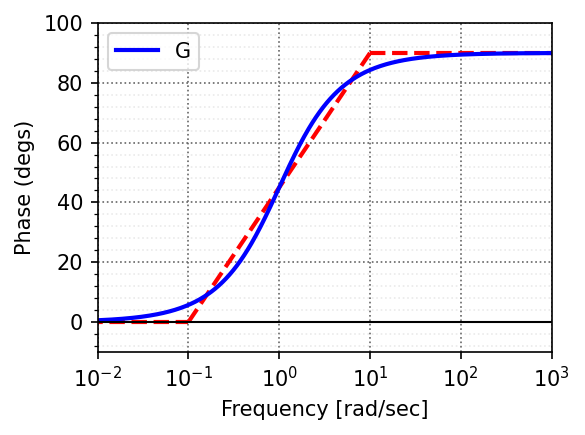

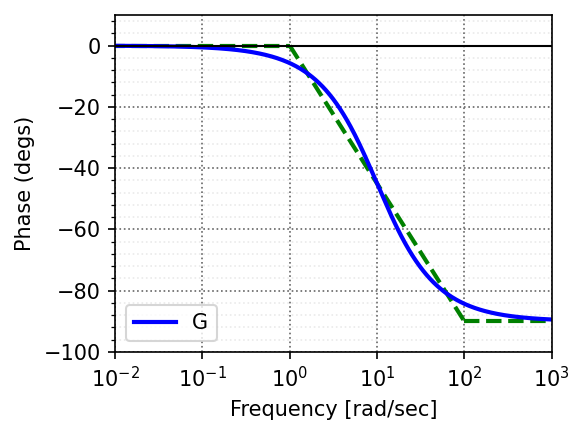

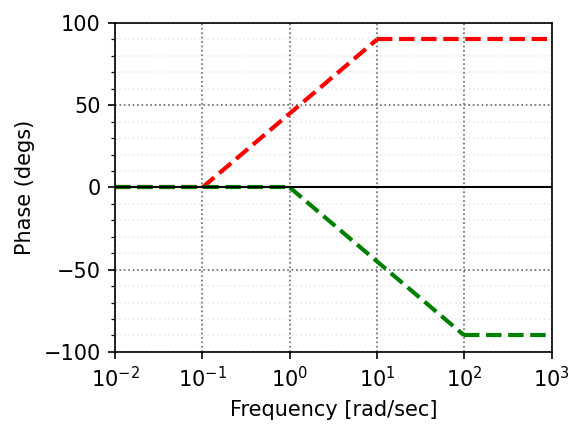

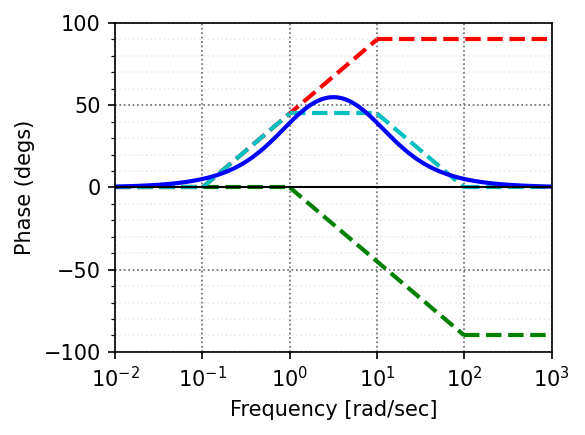

In [ ]:
w = logspace(-2,3,500)
#zero
wi = 1
G1 = tf([1/wi,1],[0,1]) 
[G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.semilogx([0,wi/10],[0,0],color='r',ls='--')
ax.semilogx([wi/10,10*wi],[0,90],color='r',ls='--')
ax.semilogx([10*wi,max(w)],[90,90],color='r',ls='--')
ax.semilogx(G1w,pshift(G1p)*r2d,'b-',label='G')
ax.legend()
ax.set_ylim([-10,100])
ax.set_ylabel("Phase (degs)")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_ph_approx_z.pdf',dpi=600)
plt.show()

# pole
wi = 10
G1 = tf([1],[1/wi,1]) 
[G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
ax.semilogx([0,wi/10],[0,0],color='g',ls='--')
ax.semilogx([wi/10,10*wi],[0,-90],color='g',ls='--')
ax.semilogx([10*wi,max(w)],[-90,-90],color='g',ls='--')
ax.semilogx(G1w,pshift(G1p)*r2d,'b-',label='G')
ax.legend()
ax.set_ylim([-100,10])
ax.set_ylabel("Phase (degs)")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_ph_approx_p.pdf',dpi=600)
plt.show()

#composite
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
wi = 1
ax.semilogx([min(w),wi/10],[0,0],color='r',ls='--')
ax.semilogx([wi/10,10*wi],[0,90],color='r',ls='--')
ax.semilogx([10*wi,max(w)],[90,90],color='r',ls='--')
wi = 10
ax.semilogx([min(w),wi/10],[0,0],color='g',ls='--')
ax.semilogx([wi/10,10*wi],[0,-90],color='g',ls='--')
ax.semilogx([10*wi,max(w)],[-90,-90],color='g',ls='--')
#
ax.set_ylim([-100,100])
ax.set_ylabel("Phase (degs)")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_ph_comp1.pdf',dpi=600)
plt.show()

#composite
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
wi = 1
ax.semilogx([min(w),wi/10],[0,0],color='r',ls='--')
ax.semilogx([wi/10,10*wi],[0,90],color='r',ls='--')
ax.semilogx([10*wi,max(w)],[90,90],color='r',ls='--')
wi = 10
ax.semilogx([min(w),wi/10],[0,0],color='g',ls='--')
ax.semilogx([wi/10,10*wi],[0,-90],color='g',ls='--')
ax.semilogx([10*wi,max(w)],[-90,-90],color='g',ls='--')
w1 = 1
w2 = 10
ax.semilogx([min(w),w1/10],[0,0],color='c',ls='--')
ax.semilogx([w1/10,w2/10],[0,90*np.log10((w2/10)/(w1/10))/2+0],color='c',ls='--')
ax.semilogx([w2/10,w1*10],[90*np.log10((w2/10)/(w1/10))/2,90*np.log10((w2/10)/(w1/10))/2],color='c',ls='--')
ax.semilogx([w1*10,w2*10],[90*np.log10((w2/10)/(w1/10))/2,90*np.log10((w2/10)/(w1/10))/2+90*np.log10((w1*10)/(w2*10))/2],color='c',ls='--')
ax.semilogx([w2*10,max(w)],[90*np.log10((w2/10)/(w1/10))/2+90*np.log10((w1*10)/(w2*10))/2,0],color='c',ls='--')
#
G1 = 20*tf([1,1],[1,10]) 
[G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
ax.semilogx(G1w,pshift(G1p)*r2d,'b-',label='G')
#
ax.set_ylim([-100,100])
ax.set_ylabel("Phase (degs)")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_ph_comp2.pdf',dpi=600)
plt.show()


## <a id='toc1_2_'></a>[Second Order](#toc0_)

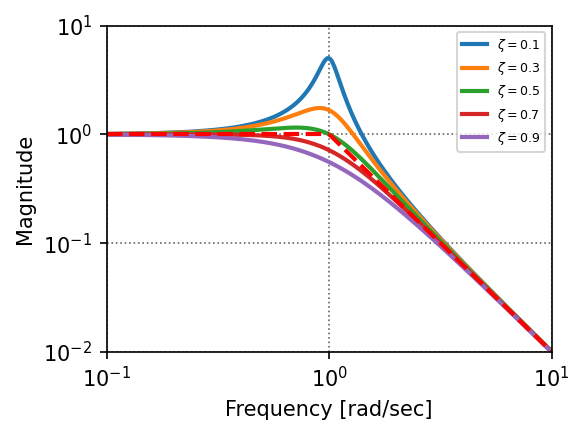

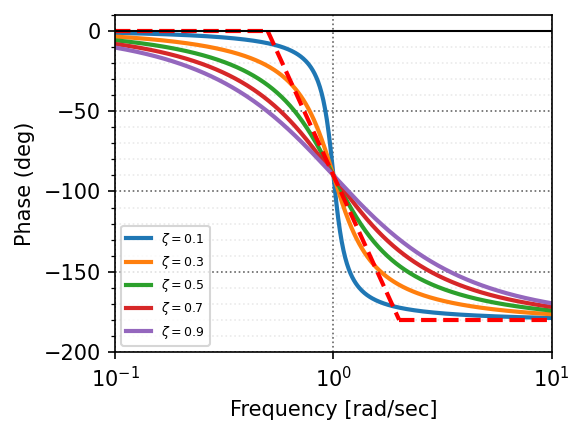

In [ ]:
w = logspace(-1,1,500)

fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
for z in np.arange(.1,1,.2):
    G1 = tf([1],[1,2*z,1]) 
    [G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
    ax.loglog(G1w,G1m,'-',label='$\zeta={:2.1f}$'.format(z))
ax.loglog([min(w),1],[1,1],color='r',ls='--')
ax.loglog([1,10],[1,.01],color='r',ls='--')
ax.loglog([10*wi,max(w)],[90,90],color='r',ls='--')
ax.legend(fontsize=6)
ax.set_ylim([.01,10])
ax.set_xlim([.1,10])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_sec_ord_mag.pdf',dpi=600)
plt.show()

w = logspace(-1,1,500)
#second order
fig, ax = plt.subplots(1,figsize=(4, 3),dpi=150)
for z in np.arange(.1,1,.2):
    G1 = tf([1],[1,2*z,1]) 
    [G1m,G1p,G1w] = bode_plot(G1,plot=False,omega=w)
    ax.semilogx(G1w,pshift(G1p)*r2d,'-',label='$\zeta={:2.1f}$'.format(z))
ax.semilogx([min(w),1/2],[0,0],color='r',ls='--')
ax.semilogx([1/2,2],[0,-180],color='r',ls='--')
ax.semilogx([2,100],[-180,-180],color='r',ls='--')
ax.legend(fontsize=6)
ax.set_ylim([-200, 10])
ax.set_xlim([.1,10])
ax.set_ylabel("Phase (deg)")
ax.set_xlabel("Frequency [rad/sec]")
nicegrid(ax)
savefig('./figs/L14_sec_ord_ph.pdf',dpi=600)
plt.show()


## <a id='toc1_3_'></a>[Examples 16-20](#toc0_)

 2            
s  + 0.2⋅s + 1
──────────────
          2   
  (s + 50)    
 2                
s  + 0.02⋅s + 0.01
──────────────────
            2     
     (s + 5)      
s + 1 
──────
s + 50
    2             
10⋅s  + 2.0⋅s + 10
──────────────────
            2     
    (s + 50)      


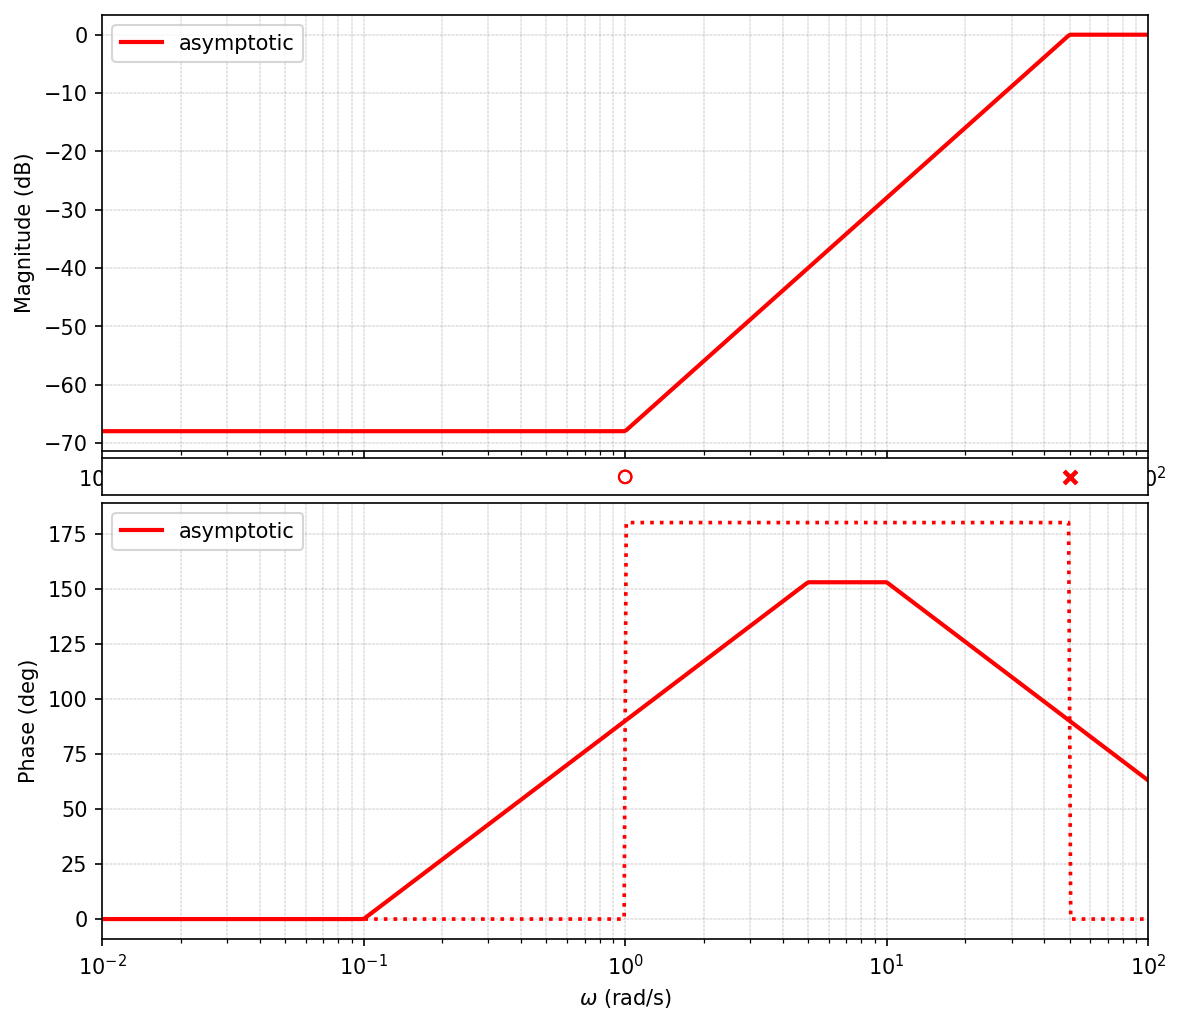

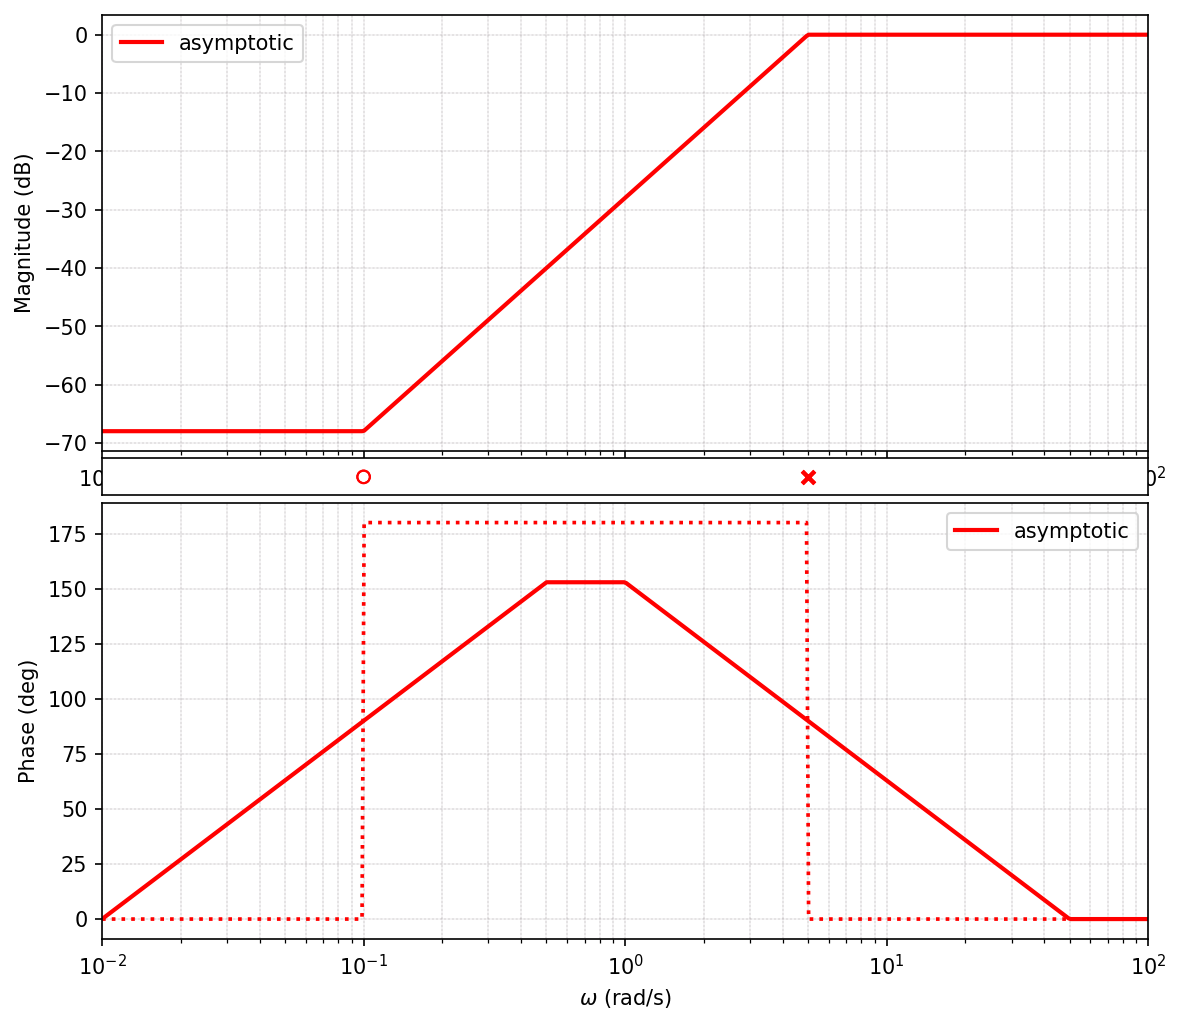

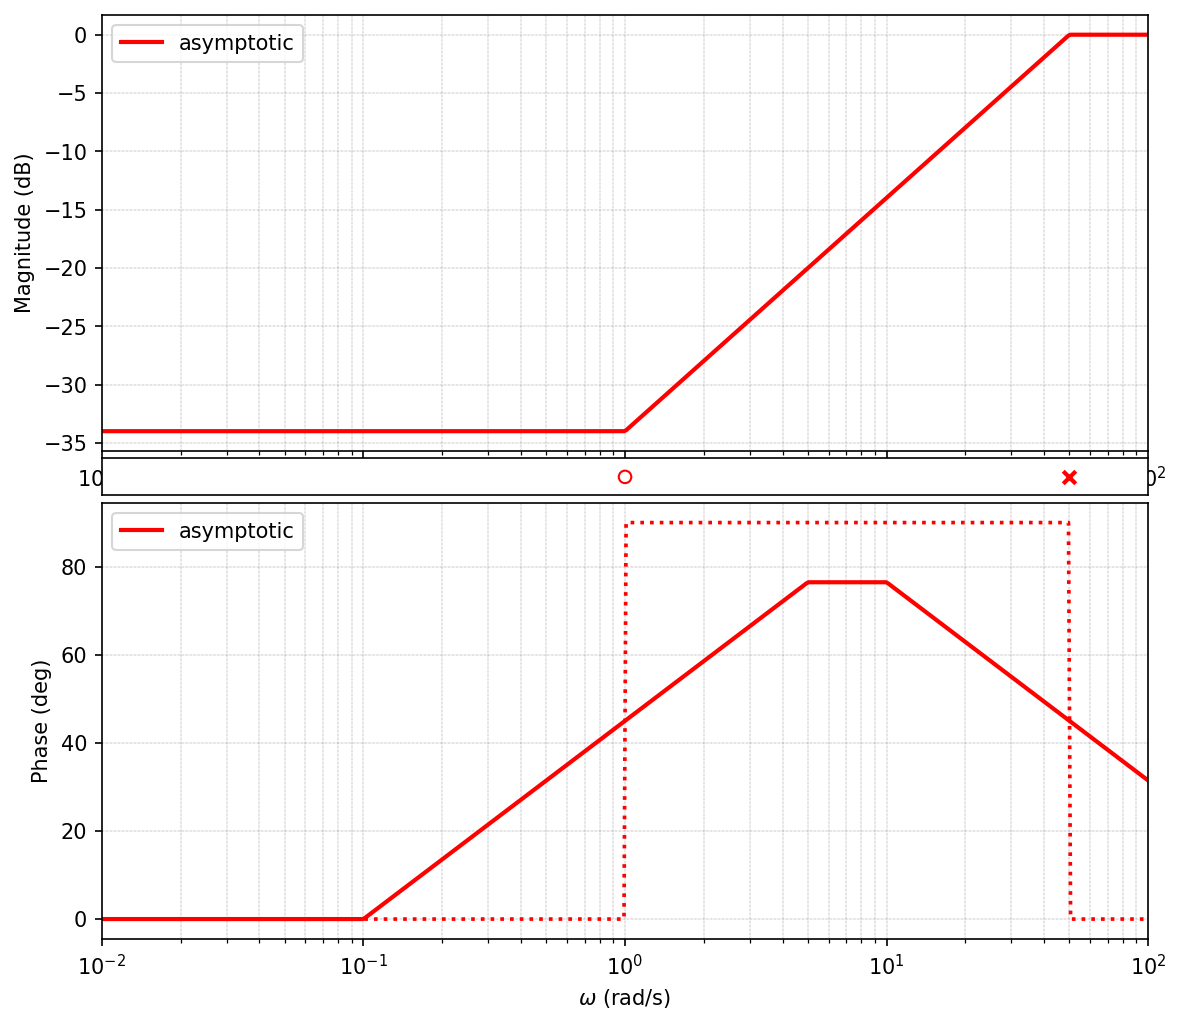

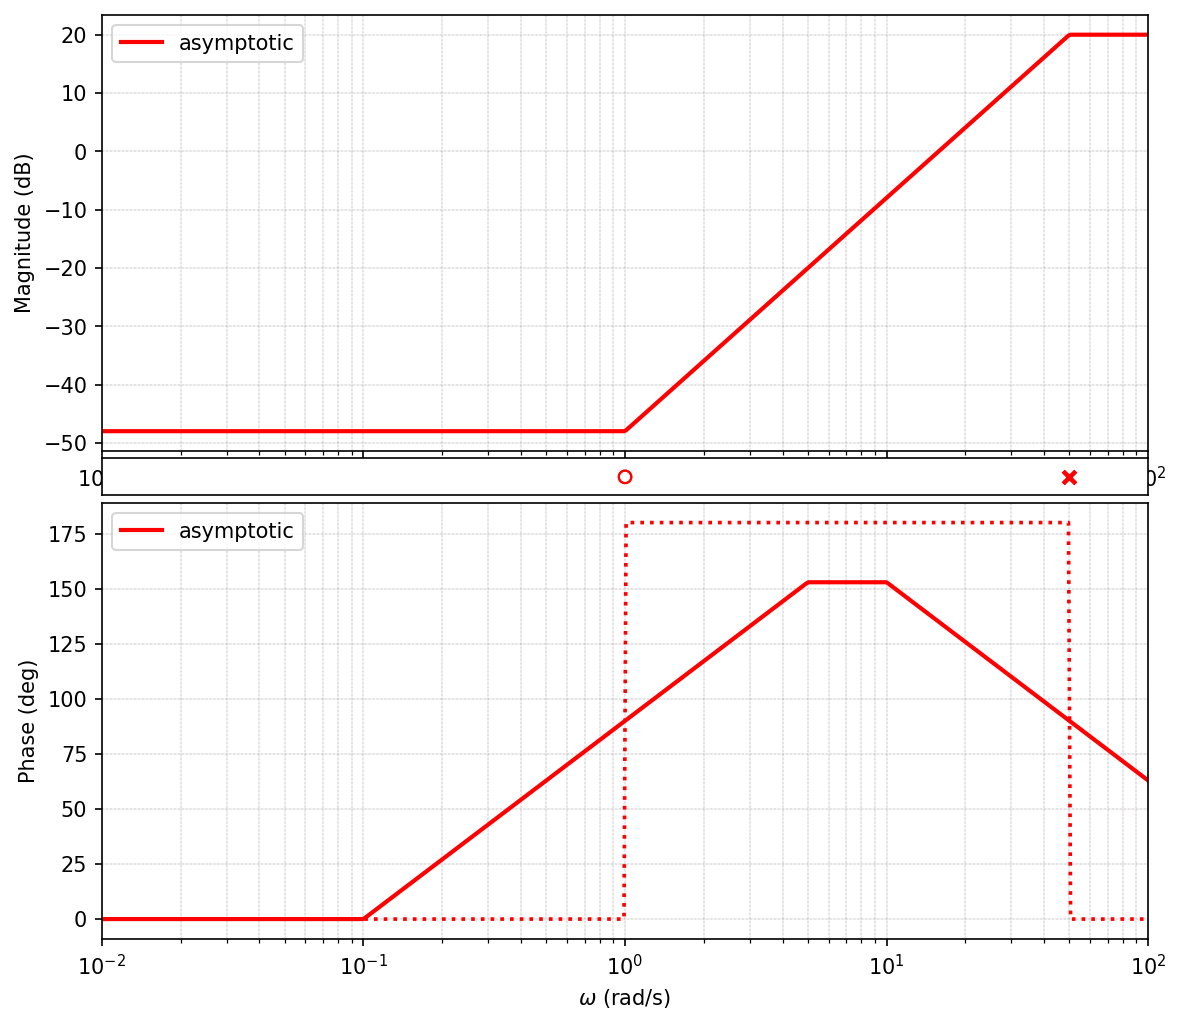

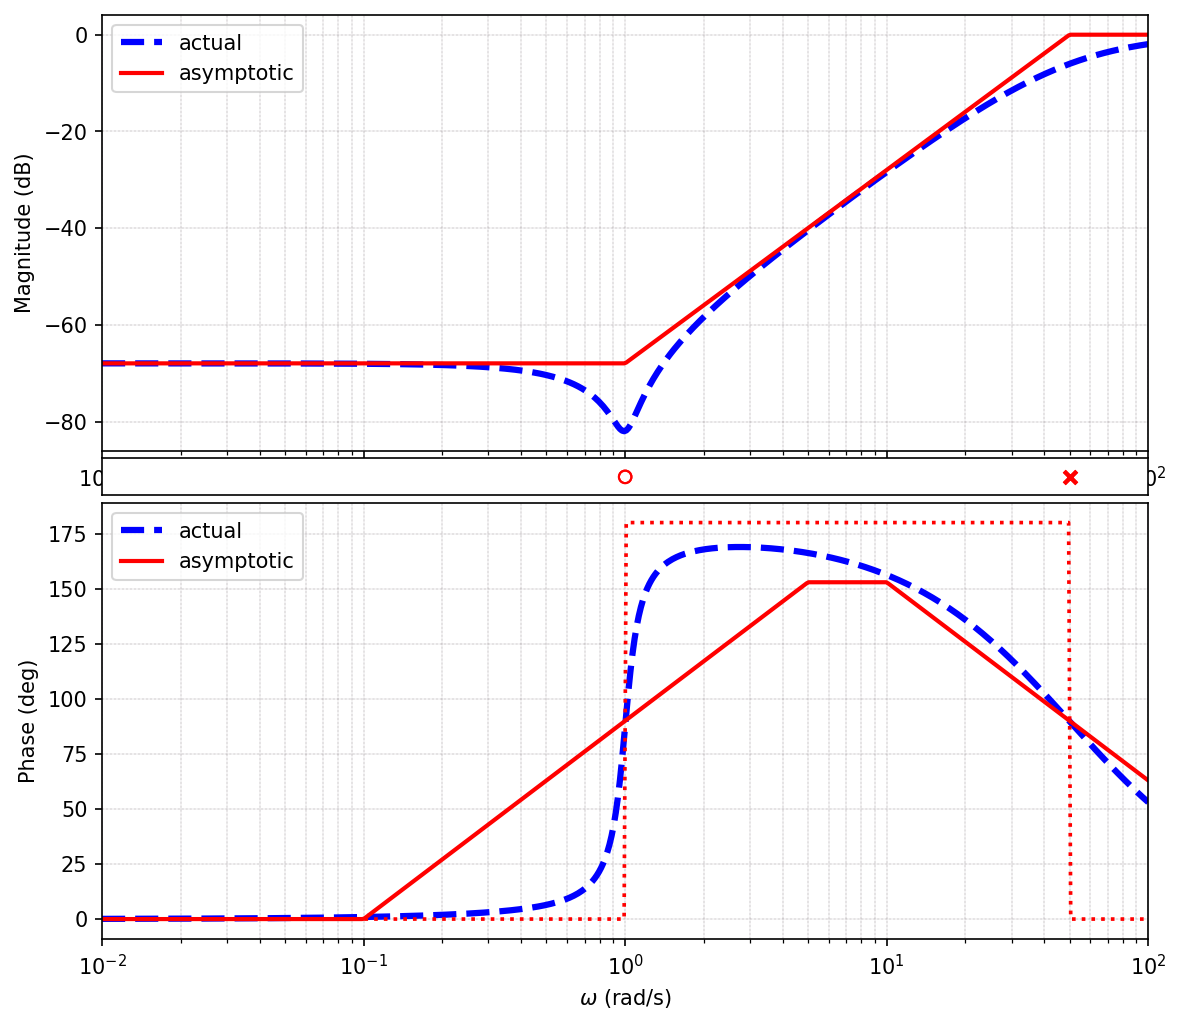

In [ ]:
#actual
num=[1, .2*.1, .1**2];den=np.convolve([1, 5],[1, 5])
num=[1, 4];den=np.convolve([1, 50],1)
num=10*[1, .2, 1];den=np.convolve([1, 50],[1, 50])

filename = "bodas_plot"
s = sympy.Symbol('s')       # define `s` as symbol

Ga = (s**2+0.2*s+1)/(s+50)**2
G1 = (s**2+0.2*.1*s+.1**2)/(s+5)**2
G2 = (s+1)/(s+50)
G3 = 10*(s**2+0.2*s+1)/(s+50)**2

sympy.pretty_print(Ga)
sympy.pretty_print(G1)
sympy.pretty_print(G2)
sympy.pretty_print(G3)

w = logspace(-2,2,500)
bodas.plot(Ga,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_20a"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(G1,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_20b"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(G2,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_20c"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(G3,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_20d"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(Ga,savefig='svg',w=w) 
fname = "./figs/L14_20act"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')

## <a id='toc1_4_'></a>[Examples 16-24](#toc0_)

        1 - s         
──────────────────────
(0.1⋅s - 1)⋅(10⋅s + 1)
        s + 1         
──────────────────────
(0.1⋅s - 1)⋅(10⋅s + 1)
        1 - s         
──────────────────────
(1 - 10⋅s)⋅(0.1⋅s + 1)
        1 - s         
──────────────────────
(1 - 10⋅s)⋅(0.1⋅s + 1)


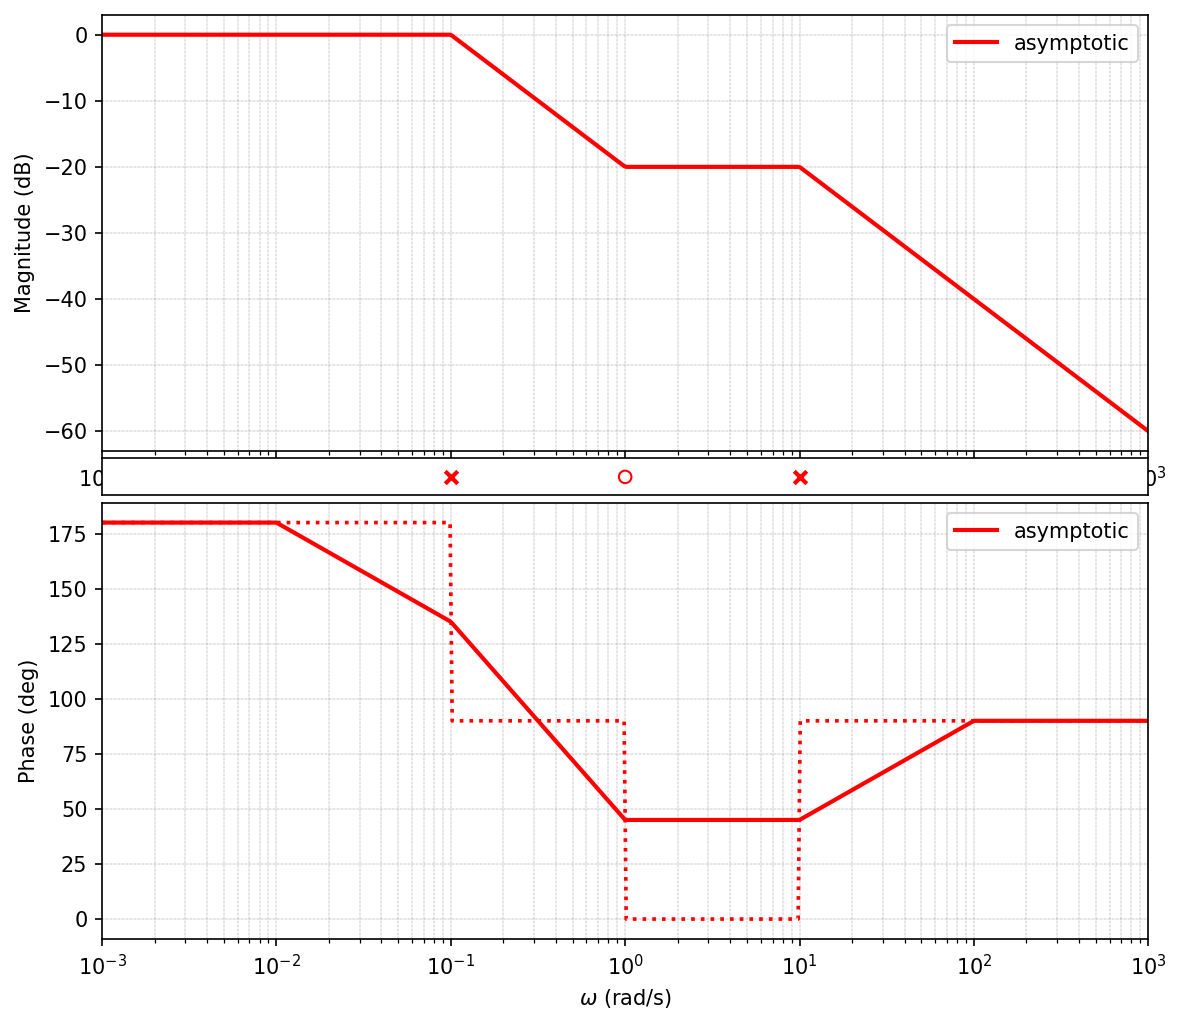

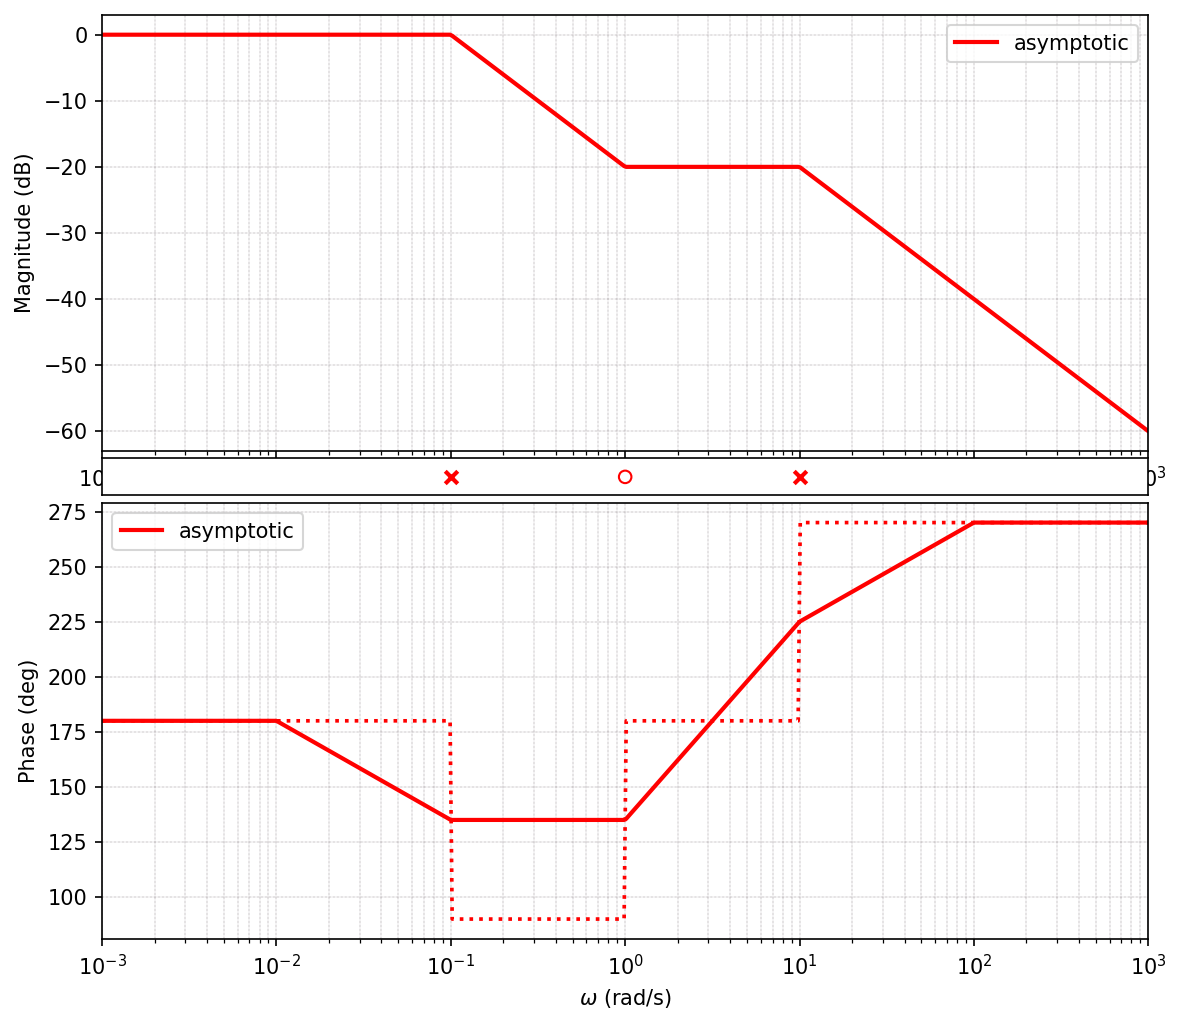

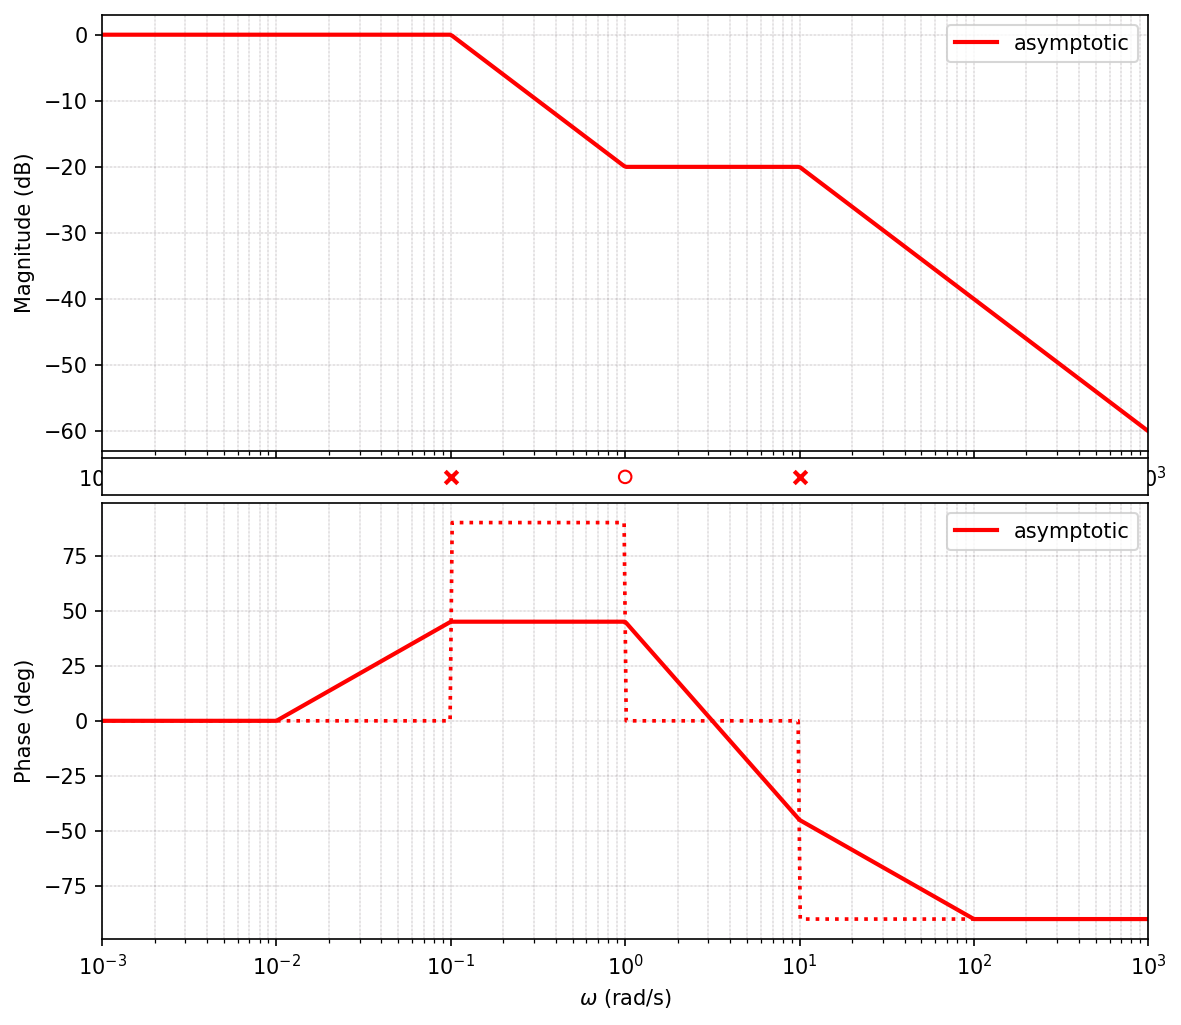

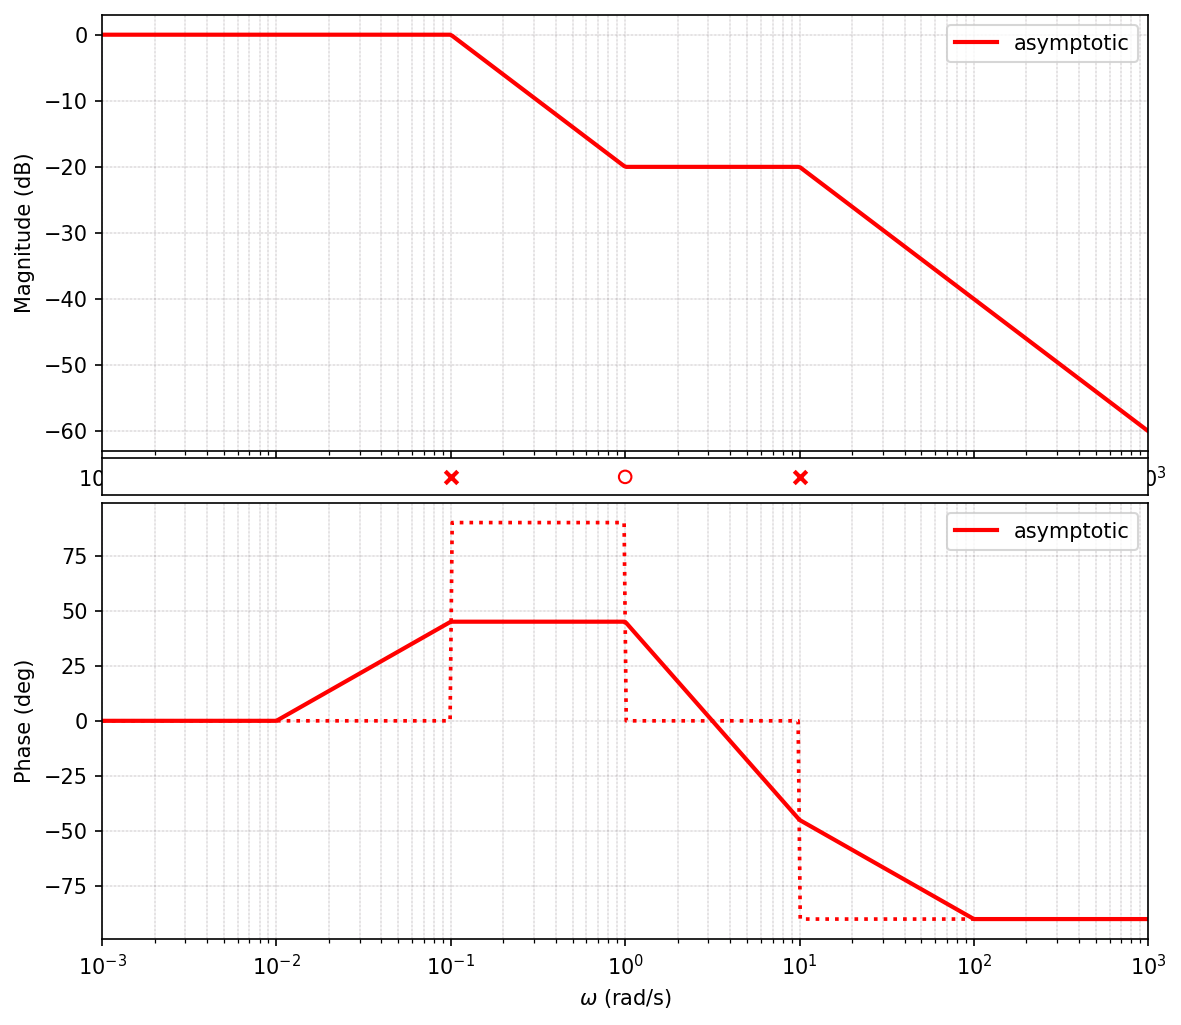

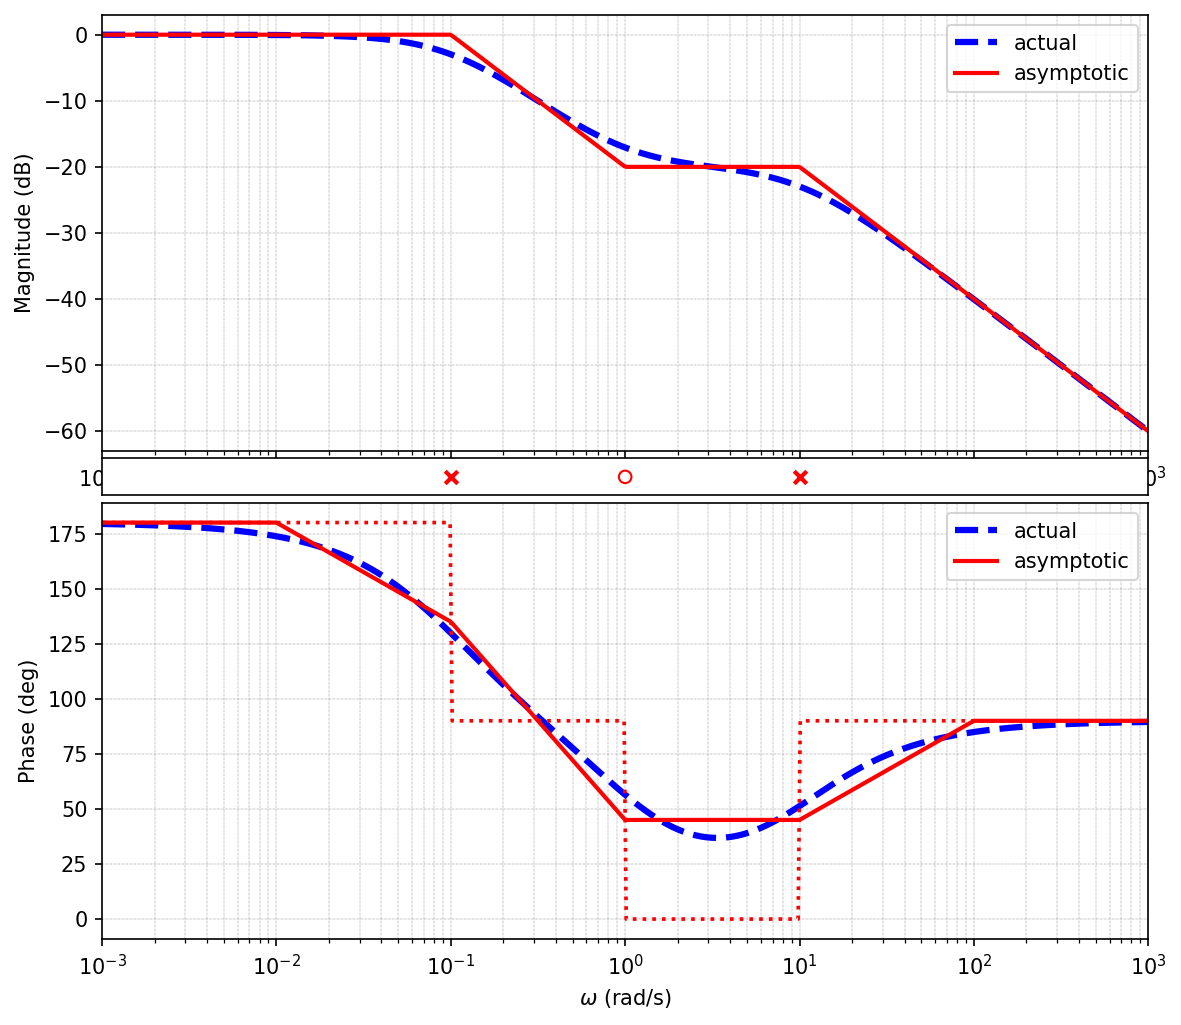

In [6]:
import cairosvg
filename = "bodas_plot"
s = sympy.Symbol('s')       # define `s` as symbol

Ga = (-s+1)/(10*s+1)/(0.1*s-1)
G1 = (s+1)/(10*s+1)/(0.1*s-1)
G2 = (-s+1)/(-10*s+1)/(0.1*s+1)
G3 = (-s+1)/(-10*s+1)/(0.1*s+1)

sympy.pretty_print(Ga)
sympy.pretty_print(G1)
sympy.pretty_print(G2)
sympy.pretty_print(G3)

w = logspace(-3,3,500)
bodas.plot(Ga,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_24a"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(G1,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_24b"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(G2,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_24c"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(G3,savefig='svg',w=w,show_actual_plot=False) 
fname = "./figs/L14_24d"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')
bodas.plot(Ga,savefig='svg',w=w) 
fname = "./figs/L14_24act"
cairosvg.svg2pdf(url=f'{filename}.svg', write_to=f'{fname}.pdf')